In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas.plotting import scatter_matrix


## LOADING THE DATA

In [2]:
dataset = pd.read_csv("german_credit.csv")

fraction_to_retain = 1.0

data= dataset.sample(frac=fraction_to_retain, random_state=42)

# demo = np.loadtxt("german.data-numeric")
# df = pd.read_csv('german.data-numeric', delim_whitespace=True, header=None)
# df.info()

# labels = [[""]]


## FIRST GLANCE

In [3]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 102
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable available 

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
521,0,4,36,2,2,10974,1,1,4,2,...,2,3,26,3,2,2,4,1,2,1
737,1,4,18,4,3,1149,4,3,4,3,...,3,1,46,3,2,2,3,1,1,1
740,1,4,12,2,2,1736,1,4,3,2,...,4,1,31,3,2,1,2,1,1,1
660,1,2,8,2,3,1414,1,3,4,3,...,2,1,33,3,2,1,3,1,1,2
411,1,4,24,3,9,2978,5,3,4,3,...,4,1,32,3,2,2,3,2,2,1


In [4]:
data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


array([[<Axes: title={'center': 'Creditability'}>,
        <Axes: title={'center': 'Account Balance'}>,
        <Axes: title={'center': 'Duration of Credit (month)'}>,
        <Axes: title={'center': 'Payment Status of Previous Credit'}>,
        <Axes: title={'center': 'Purpose'}>],
       [<Axes: title={'center': 'Credit Amount'}>,
        <Axes: title={'center': 'Value Savings/Stocks'}>,
        <Axes: title={'center': 'Length of current employment'}>,
        <Axes: title={'center': 'Instalment per cent'}>,
        <Axes: title={'center': 'Sex & Marital Status'}>],
       [<Axes: title={'center': 'Guarantors'}>,
        <Axes: title={'center': 'Duration in Current address'}>,
        <Axes: title={'center': 'Most valuable available asset'}>,
        <Axes: title={'center': 'Age (years)'}>,
        <Axes: title={'center': 'Concurrent Credits'}>],
       [<Axes: title={'center': 'Type of apartment'}>,
        <Axes: title={'center': 'No of Credits at this Bank'}>,
        <Axes: titl

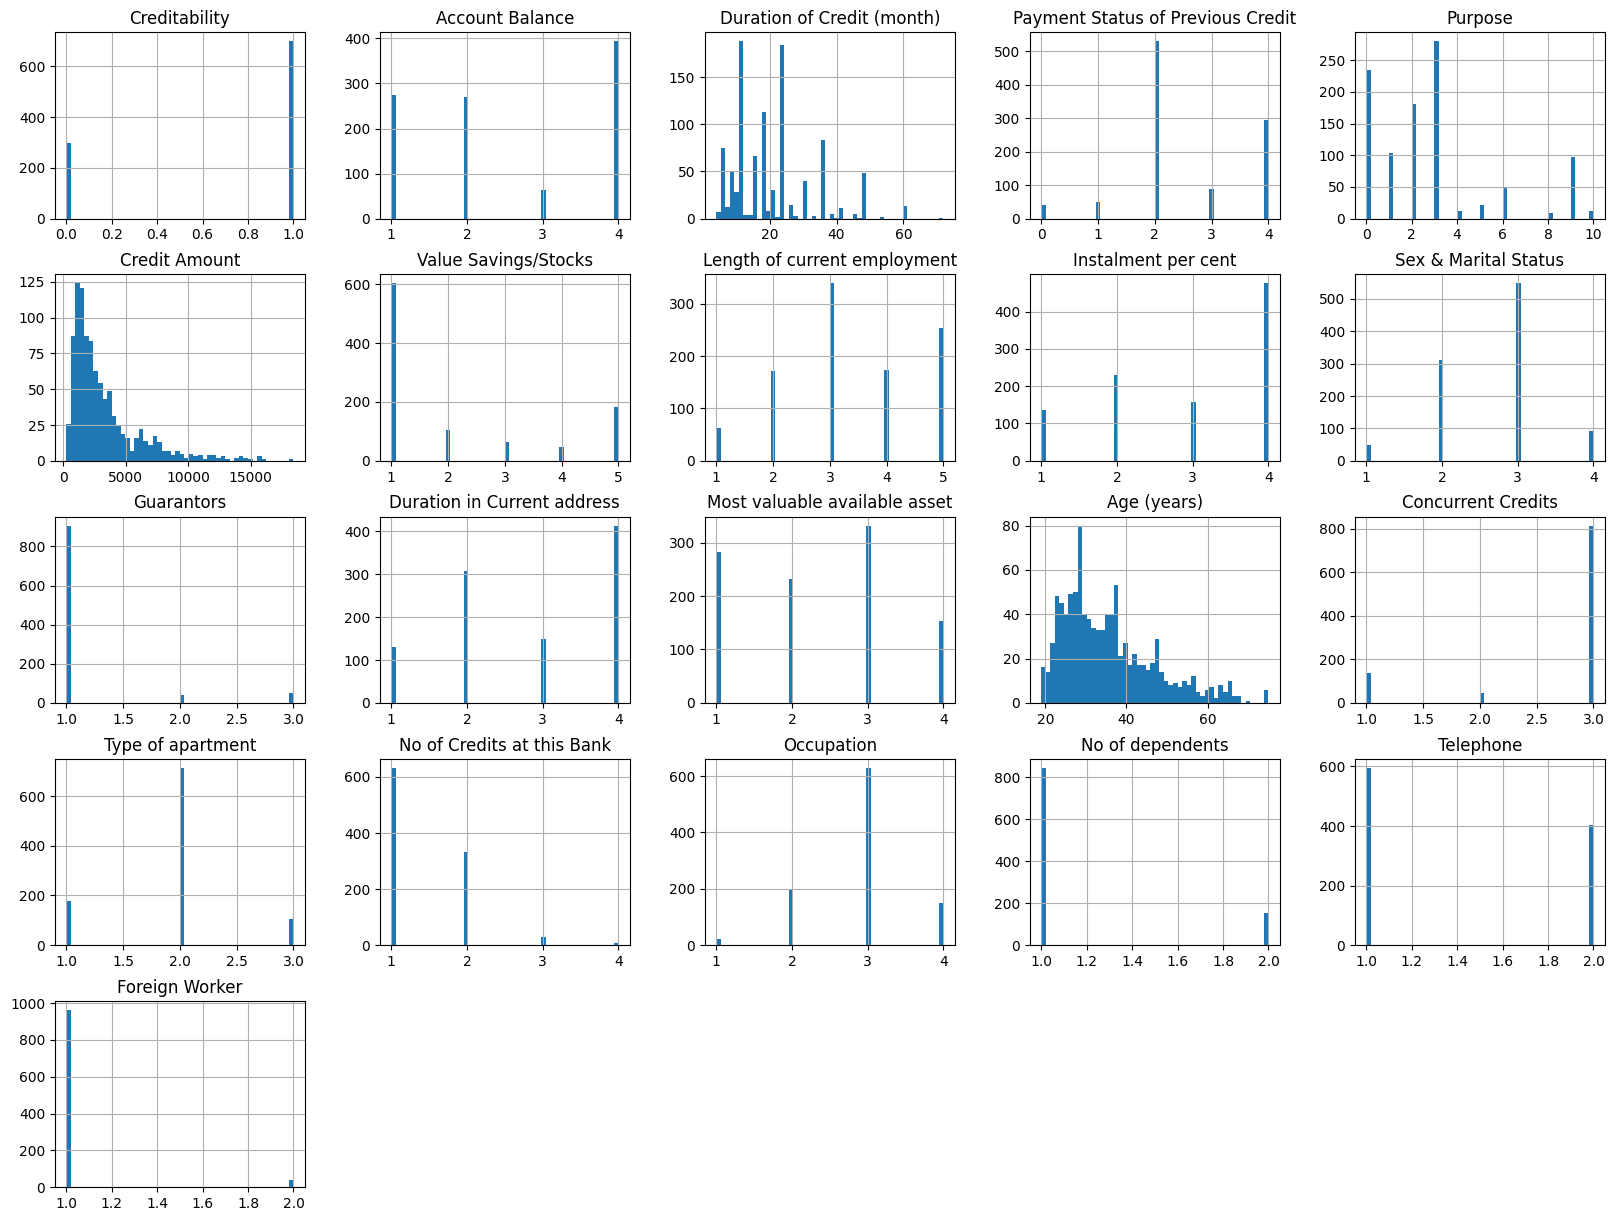

In [5]:
data.hist( bins = 50,figsize=(20,15))

In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix["Creditability"].sort_values(ascending = False)

Creditability                        1.000000
Account Balance                      0.350847
Payment Status of Previous Credit    0.228785
Value Savings/Stocks                 0.178943
Length of current employment         0.116002
Concurrent Credits                   0.109844
Age (years)                          0.091272
Sex & Marital Status                 0.088184
Foreign Worker                       0.082079
No of Credits at this Bank           0.045732
Telephone                            0.036466
Guarantors                           0.025137
Type of apartment                    0.018119
No of dependents                     0.003015
Duration in Current address         -0.002967
Purpose                             -0.017979
Occupation                          -0.032735
Instalment per cent                 -0.072404
Most valuable available asset       -0.142612
Credit Amount                       -0.154740
Duration of Credit (month)          -0.214927
Name: Creditability, dtype: float6

array([[<Axes: xlabel='Creditability', ylabel='Creditability'>,
        <Axes: xlabel='Account Balance', ylabel='Creditability'>,
        <Axes: xlabel='Payment Status of Previous Credit', ylabel='Creditability'>,
        <Axes: xlabel='Duration of Credit (month)', ylabel='Creditability'>,
        <Axes: xlabel='Credit Amount', ylabel='Creditability'>],
       [<Axes: xlabel='Creditability', ylabel='Account Balance'>,
        <Axes: xlabel='Account Balance', ylabel='Account Balance'>,
        <Axes: xlabel='Payment Status of Previous Credit', ylabel='Account Balance'>,
        <Axes: xlabel='Duration of Credit (month)', ylabel='Account Balance'>,
        <Axes: xlabel='Credit Amount', ylabel='Account Balance'>],
       [<Axes: xlabel='Creditability', ylabel='Payment Status of Previous Credit'>,
        <Axes: xlabel='Account Balance', ylabel='Payment Status of Previous Credit'>,
        <Axes: xlabel='Payment Status of Previous Credit', ylabel='Payment Status of Previous Credit'>,
    

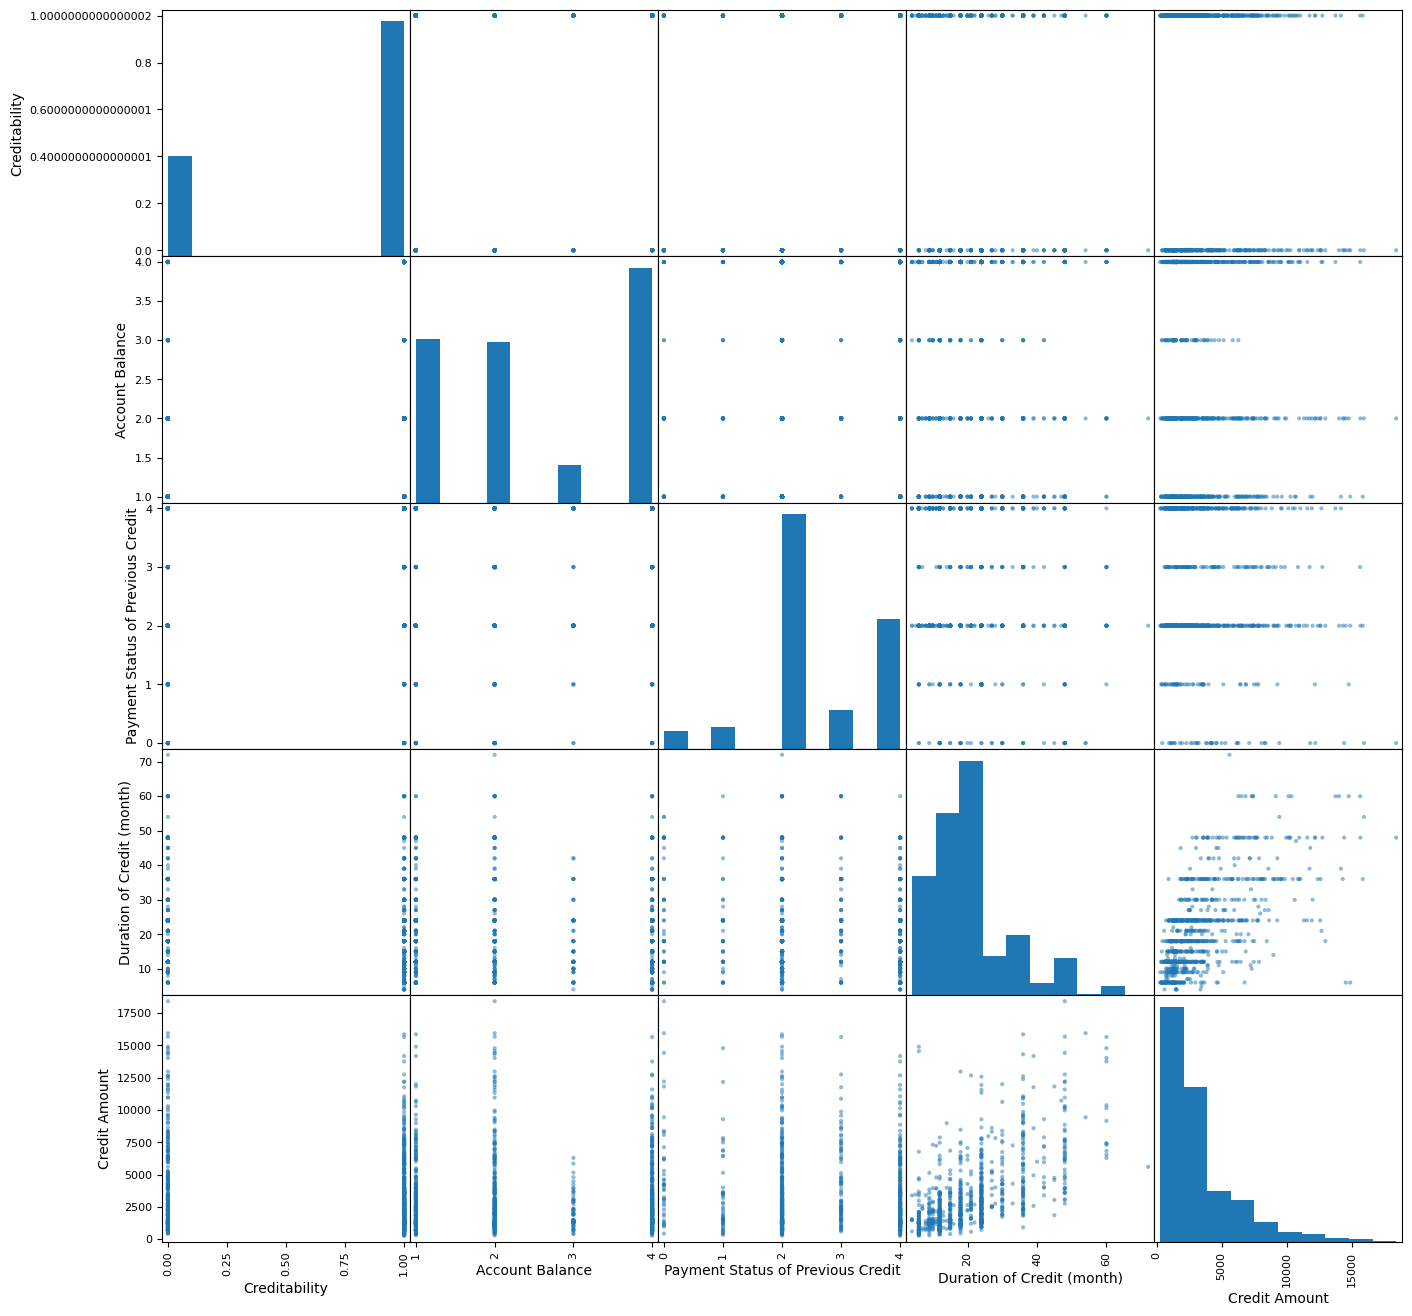

In [8]:
attributes = ["Creditability","Account Balance","Payment Status of Previous Credit","Duration of Credit (month)","Credit Amount"]
scatter_matrix(data[attributes], figsize = (16,16))

## CREATING A TRAINING AND TEST SET

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# Instantiate Stratified Shuffle Split
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets using Stratified Shuffle Split
for train_index, test_index in strat_shuff_split.split(data.drop(columns=['Creditability']), data['Creditability']):
    train = data.iloc[train_index]
    test = data.iloc[test_index]

## SELECTING A MODEL


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm

In [59]:
y_train = data["Creditability"]
# dummy = data.drop(columns=["Creditability","Type of apartment","No of dependents","Duration in Current address","Purpose","Telephone","Duration in Current address","Sex & Marital Status","Foreign Worker","Age (years)","Instalment per cent"])
x_train = data[["Duration of Credit (month)","Credit Amount","Account Balance","Payment Status of Previous Credit","Instalment per cent","Value Savings/Stocks","Length of current employment"]]

y_test = data["Creditability"]
# dummy1 = data.drop(columns=["Creditability","Type of apartment","No of dependents","Duration in Current address","Purpose","Telephone","Duration in Current address","Sex & Marital Status","Foreign Worker","Age (years)","Instalment per cent"])
x_test = data[["Duration of Credit (month)","Credit Amount","Account Balance","Payment Status of Previous Credit","Instalment per cent","Value Savings/Stocks","Length of current employment"]]

In [60]:
lgm = LogisticRegression()
dt = DecisionTreeClassifier()
dt.set_params(max_depth=11, min_samples_leaf=2, min_samples_split=3)
# svm_classifier = svm.SVC(kernel='linear', C=1.0)
# lgm.fit(x_train,y_train)
dt.fit(x_train,y_train)
# svm_classifier.fit(x_train,y_train)
# dt.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=3)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
y_predict = dt.predict(x_test)
acc = accuracy_score(y_test,y_predict) 

## MODEL EVALUATION

In [63]:
acc

0.899

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [65]:
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1_score = f1_score(y_test,y_predict)


In [66]:
precision

0.9476831091180867

In [67]:
recall

0.9057142857142857

In [68]:
f1_score

0.9262235208181154

## CROSS VALIDATION

In [69]:
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(n_splits= 5 , shuffle= True, random_state= 42)
cv_scores = cross_val_score(dt, x_train, y_train, cv=kfold, scoring='accuracy')

In [70]:
cv_scores

array([0.695, 0.725, 0.725, 0.705, 0.695])

In [71]:
m_cv = cv_scores.mean()

In [72]:
m_cv #(SHOULD BE b/w 70-75%)

0.709

## DEPLOY MODEL

In [73]:
import pickle

# Serialize the trained model
with open('CREDIT_RISK.pkl', 'wb') as f:
    pickle.dump(dt, f)